# Flight Delay Time Statistics Dashboard 
### Objectives  
After completing the lab you will be able to:  
* Know how to add multiple graphs to the dashboard  
* Work with Dash Callbacks to handle multiple outputs  

### Dataset Used  
[Airline Reporting Carrier On-Time Performance](https://developer.ibm.com/exchanges/data/all/airline/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ) dataset from [Data Asset eXchange](https://developer.ibm.com/exchanges/data/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)

# Let's start creating dash application  
### Theme
Analyze flight delays in a dashboard.  
### Dashboard Components
* Monthly average carrier delay by reporting airline for the given year.
* Monthly average weather delay by reporting airline for the given year.
* Monthly average national air system delay by reporting airline for the given year.
* Monthly average security delay by reporting airline for the given year.
* Monthly average late aircraft delay by reporting airline for the given year.  

NOTE: Year range should be between 2010 and 2020  
### Expected Output
Our dashboard application consists of three components:
* Title of the application
* Component to enter input year
* 5 Charts conveying the different types of flight delay. Chart section is divided into three segments.
    * Carrier and Weather delay in the first segment
    * National air system and Security delay in the second segment
    * Late aircraft delay in the third segment

### To do:
* Design layout for the application.
* Create a callback function. Add callback decorator, define inputs and outputs.
* Review the helper function that performs computation on the provided inputs.
* Create 5 line graphs.
* Run the application.

# Downloading and Prepping Data  
First Load *pandas dash*:  

In [1]:
!pip install pandas dash

# TASK 1 - Read the data  
Let's start with
* Importing necessary libraries
* Reading the data

In [2]:
# Import required packages
import pandas as pd
import plotly.graph_objects as go
import dash
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Input, Output

<ipython-input-2-77b175129b83>:5: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
<ipython-input-2-77b175129b83>:6: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc


In [3]:
# Read the airline data into pandas dataframe
airline_data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/airline_data.csv',
encoding = "ISO-8859-1", dtype={'Div1Airport': str, 'Div1TailNum': str, 'Div2Airport': str, 'Div2TailNum': str})

# TASK 2 - Create dash application and get the layout skeleton
Next, we create a skeleton for our dash application. Our dashboard application has three components as seen before:
* Title of the application  
* Component to enter input year inside a layout division
* 5 Charts conveying the different types of flight delay  

Mapping to the respective Dash *HTML* tags:
* Title added using *html.H1( )* tag
* Layout division added using *html.Div( )* and input component added using *dcc.Input( )* tag inside the layout division.  
* 5 charts split into three segments. Each segment has a layout division added using *html.Div( )* and chart added using *dcc.Graph( )* tag
inside the layout division.  

In [4]:
# Create a dash application
app = dash.Dash(__name__)

NOTE: We are using display as *flex* for two outer divisions to get graphs side by side in a row.

# TASK 3 - Update layout components  
### Application title  
* Title as *Flight Delay Time Statistics*, align text as *center*, color as *#503D36*, and font size as *30*. 

### Input component  
* Update [*dcc.Input*](https://dash.plotly.com/dash-core-components/input?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) component *id* as *input-year*, default *value* as *2010*, and *type* as *number*. Use *style* parameter and assign height of the input box to be *35px* and font-size to be *30*.

### Output component - Segment 1
Segment 1 is the first *html.Div( )*. We have two inner division where first two graphs will be placed.  
#### Skeleton
***
*html.Div([*
        *html.Div( ),*
        *html.Div( )*
        *], style={'display': 'flex'}),*
***  
#### First inner division
* Add *dcc.Graph( )* component.
* Update [*dcc.Graph*](https://dash.plotly.com/dash-core-components/graph?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) component *id* as *carrier-plot*.  
#### Second inner division
* Add *dcc.Graph( )* component.
* Update [*dcc.Graph*](https://dash.plotly.com/dash-core-components/graph?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) component *id* as *weather-plot*.

### Output component - Segment 2
Segment 2 is the second *html.Div( )*. We have two inner division where first two graphs will be placed.  
#### Skeleton
***
*html.Div([*
        *html.Div( ),*
        *html.Div( )*
        *], style={'display': 'flex'}),*
***  
#### First inner division
* Add *dcc.Graph( )* component.
* Update [*dcc.Graph*](https://dash.plotly.com/dash-core-components/graph?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) component *id* as *nas-plot*.  

#### Second inner division
* Add *dcc.Graph( )* component.
* Update [*dcc.Graph*](https://dash.plotly.com/dash-core-components/graph?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) component *id* as *security-plot*.

### Output component - Segment 3
Segment 3 is the last *html.Div( )*.    
#### Skeleton
***
*html.Div(, style={'width':'65%'}),*
***  
* Add *dcc.Graph( )* component to the first inner division.
* Update [*dcc.Graph*](https://dash.plotly.com/dash-core-components/graph?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) component *id* as *late-plot*.  

In [5]:
# After updating the Layout with the application title, Input and Output Componants, the app.layout will look like:
app.layout = html.Div(children=[ html.H1('Flight Delay Time Statistics', 
                                         style={'textAlign': 'center', 'color': '#503D36', 'font-size': 30}),
                                
                                html.Div(["Input Year: ", dcc.Input(id = "input-year", type = "number", value = "2010",
                                                                    style = {'height':'35px', 'font-size': 30})],
                                         style={'font-size': 30}),
                                
                                html.Br(),
                                
                                html.Br(),
                                
                                html.Div([
                                    html.Div(dcc.Graph(id = 'carrier-plot')),
                                    html.Div(dcc.Graph(id = 'weather-plot'))
                                    ], style={'display': 'flex'}),
                                
                                html.Div([
                                    html.Div(dcc.Graph(id = 'nas-plot')),
                                    html.Div(dcc.Graph(id = 'security-plot'))
                                    ], style={'display': 'flex'}),
                                
                                html.Div(dcc.Graph(id = 'late-plot'), style={'width':'65%'})
                                ])                             

# TASK 4 - Review and add supporting function
Below is the function that gets input year and data, perform computation for creating charts and plots.

In [6]:
""" Compute_info function description
This function takes in airline data and selected year as an input and performs computation for creating charts and plots.
Arguments:
airline_data: Input airline data.
entered_year: Input year for which computation needs to be performed.
Returns:
Computed average dataframes for carrier delay, weather delay, NAS delay, security delay, and late aircraft delay.
"""
def compute_info(airline_data, entered_year):
    # Select data
    df = airline_data[airline_data['Year']==int(entered_year)]
    # Compute delay averages
    avg_car = df.groupby(['Month','Reporting_Airline'])['CarrierDelay'].mean().reset_index()
    avg_weather = df.groupby(['Month','Reporting_Airline'])['WeatherDelay'].mean().reset_index()
    avg_NAS = df.groupby(['Month','Reporting_Airline'])['NASDelay'].mean().reset_index()
    avg_sec = df.groupby(['Month','Reporting_Airline'])['SecurityDelay'].mean().reset_index()
    avg_late = df.groupby(['Month','Reporting_Airline'])['LateAircraftDelay'].mean().reset_index()
    return avg_car, avg_weather, avg_NAS, avg_sec, avg_late

# TASK 5 - Add the application callback function
The core idea of this application is to get year as user input and update the dashboard in real-time. We will be using callback function for the same.
Steps:
* Define the callback decorator
* Define the callback function that uses the input provided to perform the computation
* Create graph and return it as an output
* Run the application

# TASK 6 - Update the callback function
## Callback decorator
* Refer examples provided [here](https://dash.plotly.com/basic-callbacks?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01)
* We have 5 output components added in a list. Update output component *id* parameter with the ids provided in the *dcc.Graph( )* component and set the component property as *figure*.
* Update input component *id* parameter with the id provided in the *dcc.Input( )* component and component property as *value*.
## Callback function
Next is to update the *get_graph* function. We have already added a function *compute_info* that will perform computation on the data using the input.
Mapping the returned value from the function *compute_info* to graph:
* *avg_car* - input for carrier delay
* *avg_weather* - input for weather delay
* *avg_NAS* - input for NAS delay
* *avg_sec* - input for security delay
* *avg_late* - input for late aircraft delay  

Code has been provided for plotting carrier delay. Follow the same process and use the above mapping to get plots for other 4 delays.  
Refer [here](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%204/4.8_Flight_Delay_Time_Statistics_Dashboard.py) to know how your python code should look like.   

In [7]:
# Now app.layout is updated, so we will run it
# Callback decorator
@app.callback( [Output(component_id = 'carrier-plot', component_property = 'figure'),
                Output(component_id = 'weather-plot', component_property = 'figure'),
                Output(component_id = 'nas-plot', component_property = 'figure'),
                Output(component_id = 'security-plot', component_property = 'figure'),
                Output(component_id = 'late-plot', component_property = 'figure')
               ],
              Input(component_id='input-year', component_property='value'))

# Computation to callback function and return graph
def get_graph(entered_year):
    # Compute required information for creating graph from the data
    avg_car, avg_weather, avg_NAS, avg_sec, avg_late = compute_info(airline_data, entered_year)
    # Line plot for carrier delay
    carrier_fig = px.line(avg_car, x='Month', y='CarrierDelay', color='Reporting_Airline',
                          title='Average carrier delay time(minutes) by airline')
    # Line plot for weather delay
    weather_fig = px.line(avg_weather, x='Month', y='WeatherDelay', color='Reporting_Airline',
                          title='Average weather delay time(minutes) by airline')
    # Line plot for nas delay
    nas_fig = px.line(avg_NAS, x='Month', y='NASDelay', color='Reporting_Airline',
                          title='Average nas delay time(minutes) by airline')
    # Line plot for security delay
    sec_fig = px.line(avg_sec, x='Month', y='SecurityDelay', color='Reporting_Airline',
                          title='Average security delay time(minutes) by airline')
    # Line plot for late aircraft delay
    late_fig = px.line(avg_late, x='Month', y='LateAircraftDelay', color='Reporting_Airline',
                          title='Average late aircraft delay time(minutes) by airline')
    return[carrier_fig, weather_fig, nas_fig, sec_fig, late_fig]

# TASK 6 - Run the application
* Save the file then run the python file using the following command in the **terminal**  
> *python3 < filename >.py*  
* After running the code in terminal, the port number will be shown in terminal , copy it and past in the internet explorer to see the dash (for me it is **"http://127.0.0.1:8050"**).

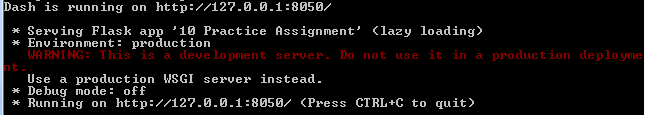

# The Dashboard Resulted After Running The Code   

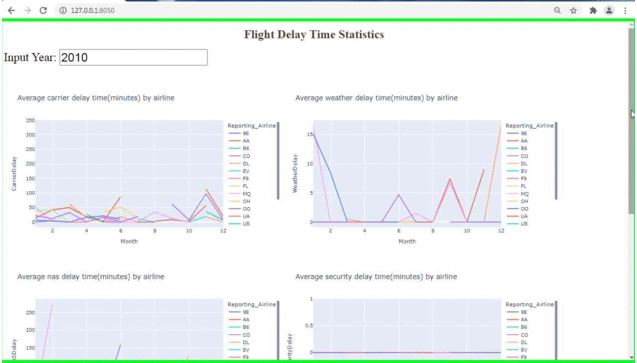

# The Full Code

## Congratulations, you have successfully created your dash application!  
# Author
[Saishruthi Swaminathan](https://www.linkedin.com/in/saishruthi-swaminathan/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) 
# Changelog
| Date       | Version | Changed by | Change Description                   |
| ---------- | ------- | ---------- | ------------------------------------ |
| 05-07-2021 | 1.1     | Saishruthi | Initial version created              |
  
## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>  


***
> ## Importent Note: This file was modified by me (Nael Aqel) as per the origin LAB in coursera, the modification contains removing all *Skills Network Cloud IDE* material as I did the full coding in *Visual Studio Code* software. And I added the dashboard resulted after running the code.
***
